In [1]:
import numpy as np
import random
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv('dfCowanDufloCI.csv')
print(df)

      HIVtreat  sex age level of education  ever married  HIV acquisition  \
0            0    1  18              F3-F4             0                1   
1            1    1  18              F3-F4             1                0   
2            0    1  18              F3-F4             0                0   
3            0    2  18              F3-F4             0                1   
4            0    1  18              F3-F4             1                1   
...        ...  ...  ..                ...           ...              ...   
5526         1    1  18              F3-F4             0                1   
5527         0    2  18              F1-F2             0                1   
5528         1    2  18              F3-F4             1                1   
5529         0    2  18              F1-F2             0                0   
5530         0    1  18              F3-F4             0                0   

      HIV-testing self-efficacy  Condom self-efficacy  \
0                 

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5531 entries, 0 to 5530
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   HIVtreat                            5531 non-null   int64 
 1   sex                                 5531 non-null   int64 
 2   age                                 5531 non-null   object
 3   level of education                  5531 non-null   object
 4   ever married                        5531 non-null   int64 
 5   HIV acquisition                     5531 non-null   int64 
 6   HIV-testing self-efficacy           5531 non-null   int64 
 7   Condom self-efficacy                5531 non-null   int64 
 8   Control around sexual partners      5531 non-null   int64 
 9   Safe sex and condoms                5531 non-null   int64 
 10  Ever had sex                        5531 non-null   int64 
 11  Two or more lifetime partners       5531 non-null   int6

In [4]:
columnas_categoricas = df.select_dtypes(include=['object', 'category', 'Int64']).columns
for col in columnas_categoricas:
    print("\nConteo de valores para la columna", col)
    print(df[col].value_counts())


Conteo de valores para la columna HIVtreat
1    2786
0    2745
Name: HIVtreat, dtype: int64

Conteo de valores para la columna sex
1    2916
2    2615
Name: sex, dtype: int64

Conteo de valores para la columna age
18       5439
21-22      79
19-20      13
Name: age, dtype: int64

Conteo de valores para la columna level of education
F3-F4              4247
F1-F2              1239
None or primary      45
Name: level of education, dtype: int64

Conteo de valores para la columna ever married
0    4140
1    1391
Name: ever married, dtype: int64

Conteo de valores para la columna HIV acquisition
1    3815
0    1716
Name: HIV acquisition, dtype: int64

Conteo de valores para la columna HIV-testing self-efficacy
1    5362
0     169
Name: HIV-testing self-efficacy, dtype: int64

Conteo de valores para la columna Condom self-efficacy
1    4760
0     771
Name: Condom self-efficacy, dtype: int64

Conteo de valores para la columna Control around sexual partners
1    4095
0    1436
Name: Control ar

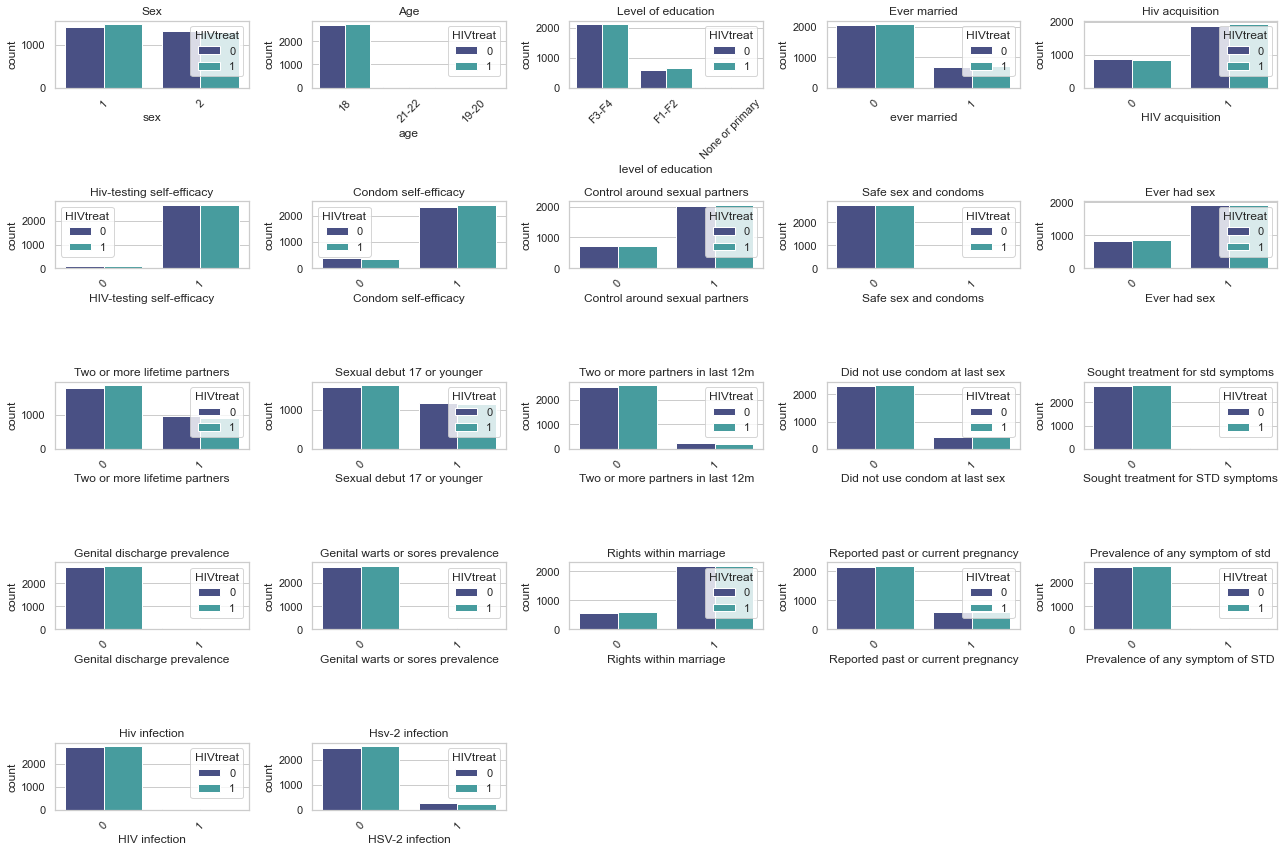

In [5]:
# Configurar el estilo de las gráficas
sns.set(style="whitegrid")

# Definir el tamaño de la figura
plt.figure(figsize=(18, 12))

# Lista de columnas categóricas
columnas_categoricas = ['sex','age', 'level of education', 'ever married', 'HIV acquisition', 'HIV-testing self-efficacy',
                        'Condom self-efficacy', 'Control around sexual partners', 'Safe sex and condoms', 'Ever had sex',
                        'Two or more lifetime partners', 'Sexual debut 17 or younger', 'Two or more partners in last 12m',
                        'Did not use condom at last sex', 'Sought treatment for STD symptoms', 'Genital discharge prevalence',
                        'Genital warts or sores prevalence', 'Rights within marriage', 'Reported past or current pregnancy',
                        'Prevalence of any symptom of STD', 'HIV infection', 'HSV-2 infection']

# Iterar sobre las columnas categóricas y crear subgráficos
for i, col in enumerate(columnas_categoricas, 1):
    plt.subplot(5, 5, i)
    
    # Graficar el conteo de cada categoría para cada grupo de HIVtreat y sex
    sns.countplot(x=col, hue='HIVtreat', data=df, palette='mako')
    
    # Ajustar el título de la gráfica
    plt.title(f'{col.capitalize()}')

    # Ajustar la leyenda
    plt.legend(title='HIVtreat')

    # Rotar etiquetas del eje x si es necesario
    plt.xticks(rotation=45)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar las gráficas
plt.show()


In [6]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)
# Función para calcular el coeficiente de contingencia
def contingency_coefficient(table):
    chi2, _, _, _ = chi2_contingency(table)
    n = table.sum().sum()
    phi2 = chi2 / n
    r, k = table.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

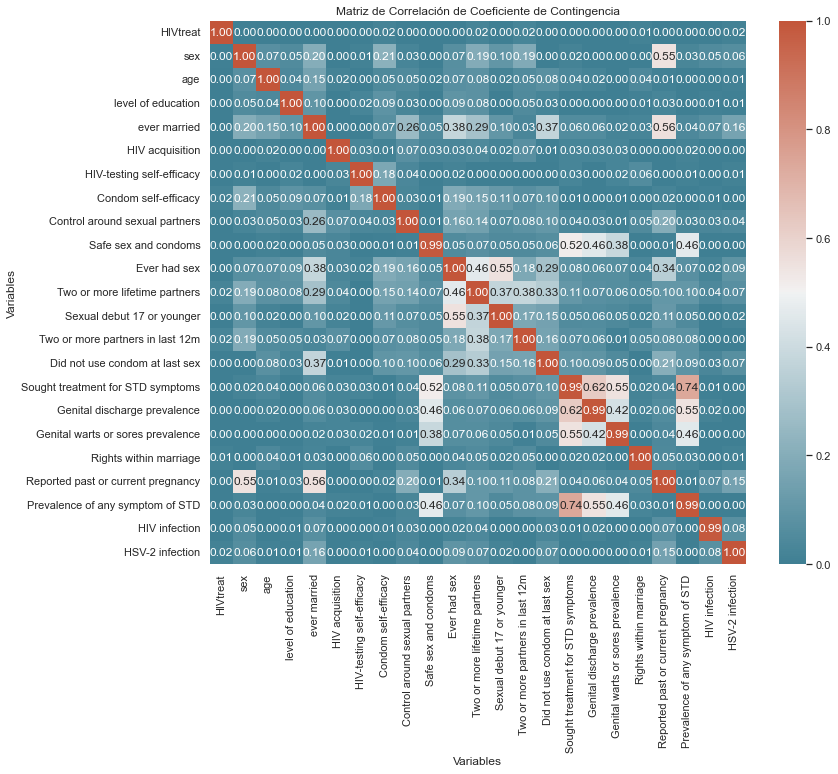

In [7]:
# Calcular la matriz de correlación
correlation_matrix = pd.DataFrame(index=df.columns, columns=df.columns)
for col1 in df.columns:
    for col2 in df.columns:
        contingency_table = pd.crosstab(df[col1], df[col2])
        correlation_matrix.loc[col1, col2] = contingency_coefficient(contingency_table)

# Convertir los valores de la matriz de correlación a números flotantes
correlation_matrix = correlation_matrix.astype(float)

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crear un mapa de calor para la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f")

# Añadir títulos y etiquetas
plt.title('Matriz de Correlación de Coeficiente de Contingencia')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Mostrar el mapa de calor
plt.show()

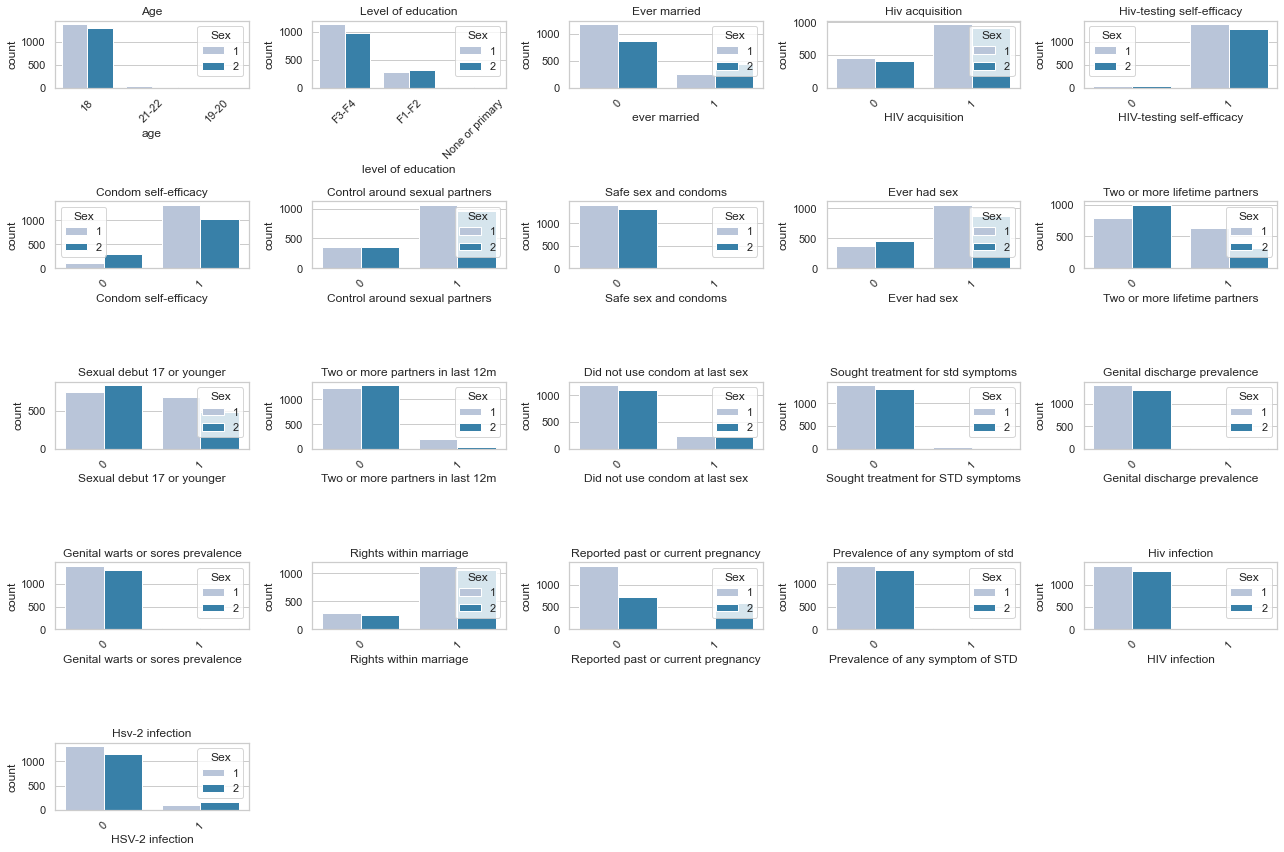

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de las gráficas
sns.set(style="whitegrid")

# Definir el tamaño de la figura
plt.figure(figsize=(18, 12))

# Lista de columnas categóricas
columnas_categoricas = ['age', 'level of education', 'ever married', 'HIV acquisition', 'HIV-testing self-efficacy',
                        'Condom self-efficacy', 'Control around sexual partners', 'Safe sex and condoms', 'Ever had sex',
                        'Two or more lifetime partners', 'Sexual debut 17 or younger', 'Two or more partners in last 12m',
                        'Did not use condom at last sex', 'Sought treatment for STD symptoms', 'Genital discharge prevalence',
                        'Genital warts or sores prevalence', 'Rights within marriage', 'Reported past or current pregnancy',
                        'Prevalence of any symptom of STD', 'HIV infection', 'HSV-2 infection']

# Iterar sobre las columnas categóricas y crear subgráficos
for i, col in enumerate(columnas_categoricas, 1):
    plt.subplot(5, 5, i)
    
    # Graficar el conteo de cada categoría para cada grupo de HIVtreat y sex
    sns.countplot(x=col, hue='sex', data=df[df['HIVtreat']==0], palette='PuBu')
    
    # Ajustar el título de la gráfica
    plt.title(f'{col.capitalize()}')

    # Ajustar la leyenda
    plt.legend(title='Sex')

    # Rotar etiquetas del eje x si es necesario
    plt.xticks(rotation=45)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar las gráficas
plt.show()


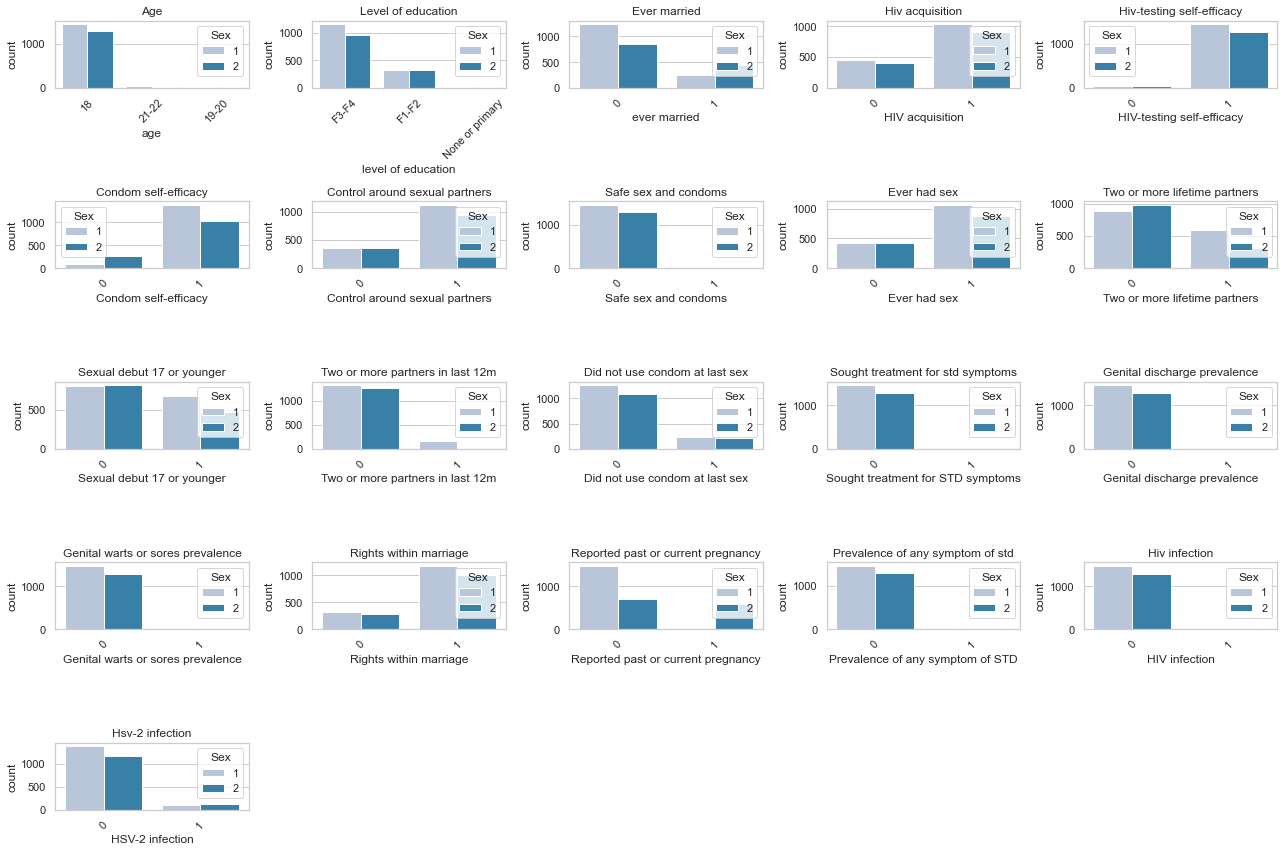

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de las gráficas
sns.set(style="whitegrid")

# Definir el tamaño de la figura
plt.figure(figsize=(18, 12))

# Lista de columnas categóricas
columnas_categoricas = ['age', 'level of education', 'ever married', 'HIV acquisition', 'HIV-testing self-efficacy',
                        'Condom self-efficacy', 'Control around sexual partners', 'Safe sex and condoms', 'Ever had sex',
                        'Two or more lifetime partners', 'Sexual debut 17 or younger', 'Two or more partners in last 12m',
                        'Did not use condom at last sex', 'Sought treatment for STD symptoms', 'Genital discharge prevalence',
                        'Genital warts or sores prevalence', 'Rights within marriage', 'Reported past or current pregnancy',
                        'Prevalence of any symptom of STD', 'HIV infection', 'HSV-2 infection']

# Iterar sobre las columnas categóricas y crear subgráficos
for i, col in enumerate(columnas_categoricas, 1):
    plt.subplot(5, 5, i)
    
    # Graficar el conteo de cada categoría para cada grupo de HIVtreat y sex
    sns.countplot(x=col, hue='sex', data=df[df['HIVtreat']==1], palette='PuBu')
    
    # Ajustar el título de la gráfica
    plt.title(f'{col.capitalize()}')

    # Ajustar la leyenda
    plt.legend(title='Sex')

    # Rotar etiquetas del eje x si es necesario
    plt.xticks(rotation=45)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar las gráficas
plt.show()


In [10]:
import pandas as pd

columnas = ['sex', 'age', 'level of education', 'ever married', 'HIV acquisition', 'HIV-testing self-efficacy',
            'Condom self-efficacy', 'Control around sexual partners', 'Safe sex and condoms', 'Ever had sex',
            'Two or more lifetime partners', 'Sexual debut 17 or younger', 'Two or more partners in last 12m',
            'Did not use condom at last sex', 'Sought treatment for STD symptoms', 'Genital discharge prevalence',
            'Genital warts or sores prevalence', 'Rights within marriage', 'Reported past or current pregnancy',
            'Prevalence of any symptom of STD', 'HIV infection', 'HSV-2 infection']

# Crear DataFrames vacíos
df_control = pd.DataFrame(columns=columnas, index=range(2353))
df_intervencion = pd.DataFrame(columns=columnas, index=range(2319))

In [11]:
# Asignar valor 1 a la columna 'sex' para las primeras 1001 filas del DataFrame de control
df_control.loc[:1000, 'sex'] = 1

# Asignar valor 1 a la columna 'sex' para las primeras 1078 filas del DataFrame de intervención
df_intervencion.loc[:1077, 'sex'] = 1

# Asignar valor 2 a la columna 'sex' para las siguientes 1352 filas del DataFrame de control
df_control.loc[1001:2353, 'sex'] = 2

# Asignar valor 2 a la columna 'sex' para las siguientes 1241 filas del DataFrame de intervención
df_intervencion.loc[1078:2319, 'sex'] = 2



In [12]:
# Asignar valores en 'HSV-2 infection' para los hombres en el grupo de control
for i in range(15):
    df_control.loc[i, "HSV-2 infection"] = 1
for i in range(15, 1001):
    df_control.loc[i, "HSV-2 infection"] = 0

# Asignar valores en 'HSV-2 infection' para los hombres en el grupo de intervención
for i in range(19):
    df_intervencion.loc[i, "HSV-2 infection"] = 1
for i in range(19, 1078):
    df_intervencion.loc[i, "HSV-2 infection"] = 0

# Asignar valores en 'HSV-2 infection' para los mujeres en el grupo de control
for i in range(1001,1133):
    df_control.loc[i, "HSV-2 infection"] = 1
for i in range(1133, 2353):
    df_control.loc[i, "HSV-2 infection"] = 0

# Asignar valores en 'HSV-2 infection' para los mujeres en el grupo de intervención
for i in range(1078,1226):
    df_intervencion.loc[i, "HSV-2 infection"] = 1
for i in range(1226, 2319):
    df_intervencion.loc[i, "HSV-2 infection"] = 0

In [13]:
def posteriores(col_categorica, priors, grupo, sexo, p_hsv2, df=df):

    # Grupo infectados

    categorias = df[col_categorica].unique()
    
    df_total = df[(df['sex'] == sexo) & (df['HIVtreat'] == grupo)]

    post1 = {}

    for i in categorias:
        df_subtotal = df_total[(df_total[col_categorica] == i)]
        df_filtrado = df_subtotal[(df_subtotal["HSV-2 infection"]==1)]
        p_hsv2_given_cat =  df_filtrado.shape[0]/df_subtotal.shape[0]
        p_cat_given_hsv2 = p_hsv2_given_cat * priors[i] / p_hsv2
        post1[i] = p_cat_given_hsv2

    total = sum(post1.values())

    for key in post1:
        post1[key] = post1[key] / total

    # Grupo no infectados

    post2 = {}

    for i in categorias:
        df_subtotal = df_total[(df_total[col_categorica] == i)]
        df_filtrado = df_subtotal[(df_subtotal["HSV-2 infection"]==0)]
        p_hsv2_given_cat =  df_filtrado.shape[0]/df_subtotal.shape[0]
        p_cat_given_hsv2 = p_hsv2_given_cat * priors[i] / (1-p_hsv2)
        post2[i] = p_cat_given_hsv2

    total = sum(post2.values())

    for key in post2:
        post2[key] = post2[key] / total
    
    return post1, post2

In [14]:
# age - hombres control
priors = {'18': 364/1001, '19-20': 356/1001, '21-22': 281/1001}
postI, postS = posteriores("age", priors, 0, 1, 15/1001)

df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==1), 'age'] = np.random.choice(list(postI.keys()), size=15, p=list(postI.values()))
df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==0), 'age'] = np.random.choice(list(postS.keys()), size=986, p=list(postS.values()))

# age - hombres intervención
priors = {'18': 388/1078, '19-20': 355/1078, '21-22': 355/1078}
postI, postS = posteriores("age", priors, 1, 1, 19/1078)

df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==1), 'age'] = np.random.choice(list(postI.keys()), size=19, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==0), 'age'] = np.random.choice(list(postS.keys()), size=1059, p=list(postS.values()))


In [15]:
# age - mujeres control
priors = {'18': 515/1352, '19-20': 422/1352, '21-22': 415/1352}
postI, postS = posteriores("age", priors, 0, 2, 132/1352)

df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==1), 'age'] = np.random.choice(list(postI.keys()), size=132, p=list(postI.values()))
df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==0), 'age'] = np.random.choice(list(postS.keys()), size=1220, p=list(postS.values()))

# age - mujeres intervención
priors = {'18': 441/1241, '19-20': 373/1241, '21-22': 427/1241}
postI, postS = posteriores("age", priors, 1, 2, 148/1241)

df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==1), 'age'] = np.random.choice(list(postI.keys()), size=148, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==0), 'age'] = np.random.choice(list(postS.keys()), size=1093, p=list(postS.values()))


In [16]:
# level of education - hombres control
priors = {'None or primary':111/1001, 'F1-F2':118/1001,'F3-F4': 772/1001}
postI, postS = posteriores("level of education", priors, 0, 1, 15/1001)

df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==1), 'level of education'] = np.random.choice(list(postI.keys()), size=15, p=list(postI.values()))
df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==0), 'level of education'] = np.random.choice(list(postS.keys()), size=986, p=list(postS.values()))

# level of education - hombres intervención
priors = {'None or primary':126/1078, 'F1-F2':142/1078,'F3-F4': 810/1078}
postI, postS = posteriores("level of education", priors, 1, 1, 19/1078)

df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==1), 'level of education'] = np.random.choice(list(postI.keys()), size=19, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==0), 'level of education'] = np.random.choice(list(postS.keys()), size=1059, p=list(postS.values()))


In [17]:
# level of education - mujeres control
priors = {'None or primary':211/1352, 'F1-F2':181/1352,'F3-F4': 970/1352}
postI, postS = posteriores("level of education", priors, 0, 2, 132/1352)

df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==1), 'level of education'] = np.random.choice(list(postI.keys()), size=132, p=list(postI.values()))
df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==0), 'level of education'] = np.random.choice(list(postS.keys()), size=1220, p=list(postS.values()))

# level of education - mujeres intervención
priors = {'None or primary':184/1241, 'F1-F2':187/1241,'F3-F4': 870/1241}
postI, postS = posteriores("level of education", priors, 1, 2, 148/1241)

df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==1), 'level of education'] = np.random.choice(list(postI.keys()), size=148, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==0), 'level of education'] = np.random.choice(list(postS.keys()), size=1093, p=list(postS.values()))


In [18]:
# ever married - hombres control
priors = {0:929/1001, 1:72/1001}
postI, postS = posteriores("ever married", priors, 0, 1, 15/1001)

df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==1), 'ever married'] = np.random.choice(list(postI.keys()), size=15, p=list(postI.values()))
df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==0), 'ever married'] = np.random.choice(list(postS.keys()), size=986, p=list(postS.values()))

# ever married - hombres intervención
priors = {0:917/1078, 1:84/1078}
postI, postS = posteriores("ever married", priors, 1, 1, 19/1078)

df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==1), 'ever married'] = np.random.choice(list(postI.keys()), size=19, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==0), 'ever married'] = np.random.choice(list(postS.keys()), size=1059, p=list(postS.values()))

In [19]:
# ever married - mujeres control
priors = {0:753/1352, 1:599/1352}
postI, postS = posteriores("ever married", priors, 0, 2, 132/1352)

df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==1), 'ever married'] = np.random.choice(list(postI.keys()), size=132, p=list(postI.values()))
df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==0), 'ever married'] = np.random.choice(list(postS.keys()), size=1220, p=list(postS.values()))

# ever married - mujeres intervención
priors = {0:662/1241, 1:579/1241}
postI, postS = posteriores("ever married", priors, 1, 2, 148/1241)

df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==1), 'ever married'] = np.random.choice(list(postI.keys()), size=148, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==0), 'ever married'] = np.random.choice(list(postS.keys()), size=1093, p=list(postS.values()))

In [20]:
# HIV acquisition - hombres control
priors = {0:737/1001, 1:229/1001}
postI, postS = posteriores("HIV acquisition", priors, 0, 1, 15/1001)

df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==1), 'HIV acquisition'] = np.random.choice(list(postI.keys()), size=15, p=list(postI.values()))
df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==0), 'HIV acquisition'] = np.random.choice(list(postS.keys()), size=986, p=list(postS.values()))

# HIV acquisition - hombres intervención
priors = {0:814/1078, 1:264/1078}
postI, postS = posteriores("HIV acquisition", priors, 1, 1, 19/1078)

df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==1), 'HIV acquisition'] = np.random.choice(list(postI.keys()), size=19, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==0), 'HIV acquisition'] = np.random.choice(list(postS.keys()), size=1059, p=list(postS.values()))

In [21]:
# HIV acquisition - mujeres control
priors = {0:1119/1352, 1:233/1352}
postI, postS = posteriores("HIV acquisition", priors, 0, 2, 132/1352)

df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==1), 'HIV acquisition'] = np.random.choice(list(postI.keys()), size=132, p=list(postI.values()))
df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==0), 'HIV acquisition'] = np.random.choice(list(postS.keys()), size=1220, p=list(postS.values()))

# HIV acquisition - mujeres intervención
priors = {0:995/1241, 1:246/1241}
postI, postS = posteriores("HIV acquisition", priors, 1, 2, 148/1241)

df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==1), 'HIV acquisition'] = np.random.choice(list(postI.keys()), size=148, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==0), 'HIV acquisition'] = np.random.choice(list(postS.keys()), size=1093, p=list(postS.values()))

In [22]:
# HIV-testing self-efficacy - hombres control
priors = {0:385/1001, 1:616/1001}
postI, postS = posteriores("HIV-testing self-efficacy", priors, 0, 1, 15/1001)

df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==1), 'HIV-testing self-efficacy'] = np.random.choice(list(postI.keys()), size=15, p=list(postI.values()))
df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==0), 'HIV-testing self-efficacy'] = np.random.choice(list(postS.keys()), size=986, p=list(postS.values()))

# HIV-testing self-efficacy - hombres intervención
priors = {0:393/1078, 1:685/1078}
postI, postS = posteriores("HIV-testing self-efficacy", priors, 1, 1, 19/1078)

df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==1), 'HIV-testing self-efficacy'] = np.random.choice(list(postI.keys()), size=19, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==0), 'HIV-testing self-efficacy'] = np.random.choice(list(postS.keys()), size=1059, p=list(postS.values()))

In [23]:
# HIV-testing self-efficacy - mujeres control
priors = {0:455/1352, 1:897/1352}
postI, postS = posteriores("HIV-testing self-efficacy", priors, 0, 2, 132/1352)

df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==1), 'HIV-testing self-efficacy'] = np.random.choice(list(postI.keys()), size=132, p=list(postI.values()))
df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==0), 'HIV-testing self-efficacy'] = np.random.choice(list(postS.keys()), size=1220, p=list(postS.values()))

# HIV-testing self-efficacy - mujeres intervención
priors = {0:369/1241, 1:872/1241}
postI, postS = posteriores("HIV-testing self-efficacy", priors, 1, 2, 148/1241)

df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==1), 'HIV-testing self-efficacy'] = np.random.choice(list(postI.keys()), size=148, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==0), 'HIV-testing self-efficacy'] = np.random.choice(list(postS.keys()), size=1093, p=list(postS.values()))

In [24]:
# Condom self-efficacy - hombres control
priors = {0:553/1001, 1:448/1001}
postI, postS = posteriores("Condom self-efficacy", priors, 0, 1, 15/1001)

df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==1), 'Condom self-efficacy'] = np.random.choice(list(postI.keys()), size=15, p=list(postI.values()))
df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==0), 'Condom self-efficacy'] = np.random.choice(list(postS.keys()), size=986, p=list(postS.values()))

# Condom self-efficacy - hombres intervención
priors = {0:554/1078, 1:524/1078}
postI, postS = posteriores("Condom self-efficacy", priors, 1, 1, 19/1078)

df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==1), 'Condom self-efficacy'] = np.random.choice(list(postI.keys()), size=19, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==0), 'Condom self-efficacy'] = np.random.choice(list(postS.keys()), size=1059, p=list(postS.values()))

In [25]:
# Condom self-efficacy - mujeres control
priors = {0:1041/1352, 1:311/1352}
postI, postS = posteriores("Condom self-efficacy", priors, 0, 2, 132/1352)

df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==1), 'Condom self-efficacy'] = np.random.choice(list(postI.keys()), size=132, p=list(postI.values()))
df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==0), 'Condom self-efficacy'] = np.random.choice(list(postS.keys()), size=1220, p=list(postS.values()))

# Condom self-efficacy - mujeres intervención
priors = {0:902/1241, 1:339/1241}
postI, postS = posteriores("Condom self-efficacy", priors, 1, 2, 148/1241)

df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==1), 'Condom self-efficacy'] = np.random.choice(list(postI.keys()), size=148, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==0), 'Condom self-efficacy'] = np.random.choice(list(postS.keys()), size=1093, p=list(postS.values()))

In [26]:
#  Control around sexual partners - hombres control
priors = {0:678/1001, 1:323/1001}
postI, postS = posteriores("Control around sexual partners", priors, 0, 1, 15/1001)

df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==1), 'Control around sexual partners'] = np.random.choice(list(postI.keys()), size=15, p=list(postI.values()))
df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==0), 'Control around sexual partners'] = np.random.choice(list(postS.keys()), size=986, p=list(postS.values()))

#  Control around sexual partners - hombres intervención
priors = {0:715/1078, 1:363/1078}
postI, postS = posteriores("Control around sexual partners", priors, 1, 1, 19/1078)

df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==1), 'Control around sexual partners'] = np.random.choice(list(postI.keys()), size=19, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==0), 'Control around sexual partners'] = np.random.choice(list(postS.keys()), size=1059, p=list(postS.values()))

In [27]:
# Control around sexual partners - mujeres control
priors = {0:979/1352, 1:373/1352}
postI, postS = posteriores("Control around sexual partners", priors, 0, 2, 132/1352)

df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==1), 'Control around sexual partners'] = np.random.choice(list(postI.keys()), size=132, p=list(postI.values()))
df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==0), 'Control around sexual partners'] = np.random.choice(list(postS.keys()), size=1220, p=list(postS.values()))

# Control around sexual partners - mujeres intervención
priors = {0:863/1241, 1:378/1241}
postI, postS = posteriores("Control around sexual partners", priors, 1, 2, 148/1241)

df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==1), 'Control around sexual partners'] = np.random.choice(list(postI.keys()), size=148, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==0), 'Control around sexual partners'] = np.random.choice(list(postS.keys()), size=1093, p=list(postS.values()))

In [28]:
# Safe sex and condoms - hombres control
priors = {0:659/1001, 1:342/1001}
postI, postS = posteriores("Safe sex and condoms", priors, 0, 1, 15/1001)

df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==1), 'Safe sex and condoms'] = np.random.choice(list(postI.keys()), size=15, p=list(postI.values()))
df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==0), 'Safe sex and condoms'] = np.random.choice(list(postS.keys()), size=986, p=list(postS.values()))

# Safe sex and condoms - hombres intervención
priors = {0:667/1078, 1:411/1078}
postI, postS = posteriores("Safe sex and condoms", priors, 1, 1, 19/1078)

df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==1), 'Safe sex and condoms'] = np.random.choice(list(postI.keys()), size=19, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==0), 'Safe sex and condoms'] = np.random.choice(list(postS.keys()), size=1059, p=list(postS.values()))

In [29]:
# Safe sex and condoms - mujeres control
priors = {0:946/1352, 1:406/1352}
postI, postS = posteriores("Safe sex and condoms", priors, 0, 2, 132/1352)

df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==1), 'Safe sex and condoms'] = np.random.choice(list(postI.keys()), size=132, p=list(postI.values()))
df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==0), 'Safe sex and condoms'] = np.random.choice(list(postS.keys()), size=1220, p=list(postS.values()))

# Safe sex and condoms - mujeres intervención
priors = {0:811/1241, 1:430/1241}
postI, postS = posteriores("Safe sex and condoms", priors, 1, 2, 148/1241)

df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==1), 'Safe sex and condoms'] = np.random.choice(list(postI.keys()), size=148, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==0), 'Safe sex and condoms'] = np.random.choice(list(postS.keys()), size=1093, p=list(postS.values()))

In [30]:
# Rights within marriage - hombres control
priors = {0:987/1001, 1:14/1001}
postI, postS = posteriores("Rights within marriage", priors, 0, 1, 15/1001)

df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==1), 'Rights within marriage'] = np.random.choice(list(postI.keys()), size=15, p=list(postI.values()))
df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==0), 'Rights within marriage'] = np.random.choice(list(postS.keys()), size=986, p=list(postS.values()))

# Rights within marriage - hombres intervención
priors = {0:1051/1078, 1:27/1078}
postI, postS = posteriores("Rights within marriage", priors, 1, 1, 19/1078)

df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==1), 'Rights within marriage'] = np.random.choice(list(postI.keys()), size=19, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==0), 'Rights within marriage'] = np.random.choice(list(postS.keys()), size=1059, p=list(postS.values()))

In [31]:
# Rights within marriage - mujeres control
priors = {0:1282/1315, 1: 33/1315}
postI, postS = posteriores("Rights within marriage", priors, 0, 2, 132/1352)

df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==1), 'Rights within marriage'] = np.random.choice(list(postI.keys()), size=132, p=list(postI.values()))
df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==0), 'Rights within marriage'] = np.random.choice(list(postS.keys()), size=1220, p=list(postS.values()))

# Rights within marriage - mujeres intervención
priors = {0:1170/1201, 1: 31/1201}
postI, postS = posteriores("Rights within marriage", priors, 1, 2, 148/1241)

df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==1), 'Rights within marriage'] = np.random.choice(list(postI.keys()), size=148, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==0), 'Rights within marriage'] = np.random.choice(list(postS.keys()), size=1093, p=list(postS.values()))

In [32]:
# Ever had sex - hombres control
priors = {0:599/1001, 1:402/1001}
postI, postS = posteriores("Ever had sex", priors, 0, 1, 15/1001)

df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==1), 'Ever had sex'] = np.random.choice(list(postI.keys()), size=15, p=list(postI.values()))
df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==0), 'Ever had sex'] = np.random.choice(list(postS.keys()), size=986, p=list(postS.values()))

# Ever had sex - hombres intervención
priors = {0:636/1078, 1:442/1078}
postI, postS = posteriores("Ever had sex", priors, 1, 1, 19/1078)

df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==1), 'Ever had sex'] = np.random.choice(list(postI.keys()), size=19, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==0), 'Ever had sex'] = np.random.choice(list(postS.keys()), size=1059, p=list(postS.values()))

In [33]:
# Ever had sex - mujeres control
priors = {0:608/1289, 1:  681/1289}
postI, postS = posteriores("Ever had sex", priors, 0, 2, 132/1352)

df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==1), 'Ever had sex'] = np.random.choice(list(postI.keys()), size=132, p=list(postI.values()))
df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==0), 'Ever had sex'] = np.random.choice(list(postS.keys()), size=1220, p=list(postS.values()))

# Ever had sex - mujeres intervención
priors = {0:569/1217, 1:  648/1217}
postI, postS = posteriores("Ever had sex", priors, 1, 2, 148/1241)

df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==1), 'Ever had sex'] = np.random.choice(list(postI.keys()), size=148, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==0), 'Ever had sex'] = np.random.choice(list(postS.keys()), size=1093, p=list(postS.values()))

In [34]:
# Sexual debut 17 or younger - hombres control
priors = {0:812/1001, 1:189/1001}
postI, postS = posteriores("Sexual debut 17 or younger", priors, 0, 1, 15/1001)

df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==1), 'Sexual debut 17 or younger'] = np.random.choice(list(postI.keys()), size=15, p=list(postI.values()))
df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==0), 'Sexual debut 17 or younger'] = np.random.choice(list(postS.keys()), size=986, p=list(postS.values()))

# Sexual debut 17 or younger - hombres intervención
priors = {0:877/1078, 1:201/1078}
postI, postS = posteriores("Sexual debut 17 or younger", priors, 1, 1, 19/1078)

df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==1), 'Sexual debut 17 or younger'] = np.random.choice(list(postI.keys()), size=19, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==0), 'Sexual debut 17 or younger'] = np.random.choice(list(postS.keys()), size=1059, p=list(postS.values()))

In [35]:
# Sexual debut 17 or younger - mujeres control
priors = {0:991/1289, 1:   298/1289}
postI, postS = posteriores("Sexual debut 17 or younger", priors, 0, 2, 132/1352)

df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==1), 'Sexual debut 17 or younger'] = np.random.choice(list(postI.keys()), size=132, p=list(postI.values()))
df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==0), 'Sexual debut 17 or younger'] = np.random.choice(list(postS.keys()), size=1220, p=list(postS.values()))

# Sexual debut 17 or younger - mujeres intervención
priors = {0:922/1217, 1:   295/1217}
postI, postS = posteriores("Sexual debut 17 or younger", priors, 1, 2, 148/1241)

df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==1), 'Sexual debut 17 or younger'] = np.random.choice(list(postI.keys()), size=148, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==0), 'Sexual debut 17 or younger'] = np.random.choice(list(postS.keys()), size=1093, p=list(postS.values()))

In [36]:
# Two or more lifetime partners - hombres control
priors = {0:723/1001, 1:278/1001}
postI, postS = posteriores("Two or more lifetime partners", priors, 0, 1, 15/1001)

df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==1), 'Two or more lifetime partners'] = np.random.choice(list(postI.keys()), size=15, p=list(postI.values()))
df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==0), 'Two or more lifetime partners'] = np.random.choice(list(postS.keys()), size=986, p=list(postS.values()))

# Two or more lifetime partners - hombres intervención
priors = {0:775/1078, 1:303/1078}
postI, postS = posteriores("Two or more lifetime partners", priors, 1, 1, 19/1078)

df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==1), 'Two or more lifetime partners'] = np.random.choice(list(postI.keys()), size=19, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==0), 'Two or more lifetime partners'] = np.random.choice(list(postS.keys()), size=1059, p=list(postS.values()))

In [37]:
# Two or more lifetime partners - mujeres control
priors = {0:1151/1289, 1: 138/1289}
postI, postS = posteriores("Two or more lifetime partners", priors, 0, 2, 132/1352)

df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==1), 'Two or more lifetime partners'] = np.random.choice(list(postI.keys()), size=132, p=list(postI.values()))
df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==0), 'Two or more lifetime partners'] = np.random.choice(list(postS.keys()), size=1220, p=list(postS.values()))

# Two or more lifetime partners - mujeres intervención
priors = {0:1075/1217, 1: 142/1217}
postI, postS = posteriores("Two or more lifetime partners", priors, 1, 2, 148/1241)

df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==1), 'Two or more lifetime partners'] = np.random.choice(list(postI.keys()), size=148, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==0), 'Two or more lifetime partners'] = np.random.choice(list(postS.keys()), size=1093, p=list(postS.values()))

In [38]:
# Two or more partners in last 12m - hombres control
priors = {0:884/1001, 1:117/1001}
postI, postS = posteriores("Two or more partners in last 12m", priors, 0, 1, 15/1001)

df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==1), 'Two or more partners in last 12m'] = np.random.choice(list(postI.keys()), size=15, p=list(postI.values()))
df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==0), 'Two or more partners in last 12m'] = np.random.choice(list(postS.keys()), size=986, p=list(postS.values()))

# Two or more partners in last 12m - hombres intervención
priors = {0:969/1078, 1:109/1078}
postI, postS = posteriores("Two or more partners in last 12m", priors, 1, 1, 19/1078)

df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==1), 'Two or more partners in last 12m'] = np.random.choice(list(postI.keys()), size=19, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==0), 'Two or more partners in last 12m'] = np.random.choice(list(postS.keys()), size=1059, p=list(postS.values()))

In [39]:
# Two or more partners in last 12m - mujeres control
priors = {0:1067/1102, 1:  35/1102}
postI, postS = posteriores("Two or more partners in last 12m", priors, 0, 2, 132/1352)

df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==1), 'Two or more partners in last 12m'] = np.random.choice(list(postI.keys()), size=132, p=list(postI.values()))
df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==0), 'Two or more partners in last 12m'] = np.random.choice(list(postS.keys()), size=1220, p=list(postS.values()))

# Two or more partners in last 12m - mujeres intervención
priors = {0:930/957, 1:  27/957}
postI, postS = posteriores("Two or more partners in last 12m", priors, 1, 2, 148/1241)

df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==1), 'Two or more partners in last 12m'] = np.random.choice(list(postI.keys()), size=148, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==0), 'Two or more partners in last 12m'] = np.random.choice(list(postS.keys()), size=1093, p=list(postS.values()))

In [40]:
# Did not use condom at last sex - hombres control
priors = {0:822/1001, 1:179/1001}
postI, postS = posteriores("Did not use condom at last sex", priors, 0, 1, 15/1001)

df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==1), 'Did not use condom at last sex'] = np.random.choice(list(postI.keys()), size=15, p=list(postI.values()))
df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==0), 'Did not use condom at last sex'] = np.random.choice(list(postS.keys()), size=986, p=list(postS.values()))

# Did not use condom at last sex - hombres intervención
priors = {0:876/1078, 1:202/1078}
postI, postS = posteriores("Did not use condom at last sex", priors, 1, 1, 19/1078)

df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==1), 'Did not use condom at last sex'] = np.random.choice(list(postI.keys()), size=19, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==0), 'Did not use condom at last sex'] = np.random.choice(list(postS.keys()), size=1059, p=list(postS.values()))

In [41]:
# Did not use condom at last sex - mujeres control
priors = {0:768/1282, 1: 514/1282}
postI, postS = posteriores("Did not use condom at last sex", priors, 0, 2, 132/1352)

df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==1), 'Did not use condom at last sex'] = np.random.choice(list(postI.keys()), size=132, p=list(postI.values()))
df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==0), 'Did not use condom at last sex'] = np.random.choice(list(postS.keys()), size=1220, p=list(postS.values()))

# Did not use condom at last sex - mujeres intervención
priors = {0:711/1209, 1: 498/1209}
postI, postS = posteriores("Did not use condom at last sex", priors, 1, 2, 148/1241)

df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==1), 'Did not use condom at last sex'] = np.random.choice(list(postI.keys()), size=148, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==0), 'Did not use condom at last sex'] = np.random.choice(list(postS.keys()), size=1093, p=list(postS.values()))

In [42]:
# Sought treatment for STD symptoms - hombres control
priors = {0:73/145, 1: 72/145}
postI, postS = posteriores("Sought treatment for STD symptoms", priors, 0, 1, 15/1001)

df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==1), 'Sought treatment for STD symptoms'] = np.random.choice(list(postI.keys()), size=15, p=list(postI.values()))
df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==0), 'Sought treatment for STD symptoms'] = np.random.choice(list(postS.keys()), size=986, p=list(postS.values()))

# Sought treatment for STD symptoms - hombres intervención
priors = {0:83/157, 1:74/157}
postI, postS = posteriores("Sought treatment for STD symptoms", priors, 1, 1, 19/1078)

df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==1), 'Sought treatment for STD symptoms'] = np.random.choice(list(postI.keys()), size=19, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==0), 'Sought treatment for STD symptoms'] = np.random.choice(list(postS.keys()), size=1059, p=list(postS.values()))

In [43]:
# Sought treatment for STD symptoms - mujeres control
priors = {0:122/222, 1:  100/222}
postI, postS = posteriores("Sought treatment for STD symptoms", priors, 0, 2, 132/1352)

df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==1), 'Sought treatment for STD symptoms'] = np.random.choice(list(postI.keys()), size=132, p=list(postI.values()))
df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==0), 'Sought treatment for STD symptoms'] = np.random.choice(list(postS.keys()), size=1220, p=list(postS.values()))

# Sought treatment for STD symptoms - mujeres intervención
priors = {0:116/209, 1:  93/209}
postI, postS = posteriores("Sought treatment for STD symptoms", priors, 1, 2, 148/1241)

df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==1), 'Sought treatment for STD symptoms'] = np.random.choice(list(postI.keys()), size=148, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==0), 'Sought treatment for STD symptoms'] = np.random.choice(list(postS.keys()), size=1093, p=list(postS.values()))

In [44]:
# Genital discharge prevalence - hombres control
priors = {0:867/950, 1:83/950}
postI, postS = posteriores("Genital discharge prevalence", priors, 0, 1, 15/1001)

df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==1), 'Genital discharge prevalence'] = np.random.choice(list(postI.keys()), size=15, p=list(postI.values()))
df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==0), 'Genital discharge prevalence'] = np.random.choice(list(postS.keys()), size=986, p=list(postS.values()))

# Genital discharge prevalence - hombres intervención
priors = {0:928/1023, 1: 95/1023}
postI, postS = posteriores("Genital discharge prevalence", priors, 1, 1, 19/1078)

df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==1), 'Genital discharge prevalence'] = np.random.choice(list(postI.keys()), size=19, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==0), 'Genital discharge prevalence'] = np.random.choice(list(postS.keys()), size=1059, p=list(postS.values()))

In [45]:
# Genital discharge prevalence - mujeres control
priors = {0:1137/1297, 1: 160/1297}
postI, postS = posteriores("Genital discharge prevalence", priors, 0, 2, 132/1352)

df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==1), 'Genital discharge prevalence'] = np.random.choice(list(postI.keys()), size=132, p=list(postI.values()))
df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==0), 'Genital discharge prevalence'] = np.random.choice(list(postS.keys()), size=1220, p=list(postS.values()))

# Genital discharge prevalence - mujeres intervención
priors = {0:1052/1191, 1: 139/1191}
postI, postS = posteriores("Genital discharge prevalence", priors, 1, 2, 148/1241)

df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==1), 'Genital discharge prevalence'] = np.random.choice(list(postI.keys()), size=148, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==0), 'Genital discharge prevalence'] = np.random.choice(list(postS.keys()), size=1093, p=list(postS.values()))

In [46]:
# Genital warts or sores prevalence - hombres control
priors = {0:866/950, 1: 84/950}
postI, postS = posteriores("Genital warts or sores prevalence", priors, 0, 1, 15/1001)

df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==1), 'Genital warts or sores prevalence'] = np.random.choice(list(postI.keys()), size=15, p=list(postI.values()))
df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==0), 'Genital warts or sores prevalence'] = np.random.choice(list(postS.keys()), size=986, p=list(postS.values()))

# Genital warts or sores prevalence - hombres intervención
priors = {0:929/1023, 1: 84/1013}
postI, postS = posteriores("Genital warts or sores prevalence", priors, 1, 1, 19/1078)

df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==1), 'Genital warts or sores prevalence'] = np.random.choice(list(postI.keys()), size=19, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==0), 'Genital warts or sores prevalence'] = np.random.choice(list(postS.keys()), size=1059, p=list(postS.values()))

In [47]:
# Genital warts or sores prevalence - mujeres control
priors = {0:1168/1280, 1:  112/1280}
postI, postS = posteriores("Genital warts or sores prevalence", priors, 0, 2, 132/1352)

df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==1), 'Genital warts or sores prevalence'] = np.random.choice(list(postI.keys()), size=132, p=list(postI.values()))
df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==0), 'Genital warts or sores prevalence'] = np.random.choice(list(postS.keys()), size=1220, p=list(postS.values()))

# Genital warts or sores prevalence - mujeres intervención
priors = {0:1081/1164, 1:  83/1164}
postI, postS = posteriores("Genital warts or sores prevalence", priors, 1, 2, 148/1241)

df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==1), 'Genital warts or sores prevalence'] = np.random.choice(list(postI.keys()), size=148, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==0), 'Genital warts or sores prevalence'] = np.random.choice(list(postS.keys()), size=1093, p=list(postS.values()))

In [48]:
# Prevalence of any symptom of STD - hombres control
priors = {0:624/991, 1:  367/991}
postI, postS = posteriores("Prevalence of any symptom of STD", priors, 0, 1, 15/1001)

df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==1), 'Prevalence of any symptom of STD'] = np.random.choice(list(postI.keys()), size=15, p=list(postI.values()))
df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==0), 'Prevalence of any symptom of STD'] = np.random.choice(list(postS.keys()), size=986, p=list(postS.values()))

# Prevalence of any symptom of STD - hombres intervención
priors = {0:653/1060, 1: 407/1060}
postI, postS = posteriores("Prevalence of any symptom of STD", priors, 1, 1, 19/1078)

df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==1), 'Prevalence of any symptom of STD'] = np.random.choice(list(postI.keys()), size=19, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==0), 'Prevalence of any symptom of STD'] = np.random.choice(list(postS.keys()), size=1059, p=list(postS.values()))

In [49]:
# Prevalence of any symptom of STD - mujeres control
priors = {0:854/1336, 1: 482/1336}
postI, postS = posteriores("Prevalence of any symptom of STD", priors, 0, 2, 132/1352)

df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==1), 'Prevalence of any symptom of STD'] = np.random.choice(list(postI.keys()), size=132, p=list(postI.values()))
df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==0), 'Prevalence of any symptom of STD'] = np.random.choice(list(postS.keys()), size=1220, p=list(postS.values()))

# Prevalence of any symptom of STD - mujeres intervención
priors = {0:820/1231, 1: 411/1231}
postI, postS = posteriores("Prevalence of any symptom of STD", priors, 1, 2, 148/1241)

df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==1), 'Prevalence of any symptom of STD'] = np.random.choice(list(postI.keys()), size=148, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==0), 'Prevalence of any symptom of STD'] = np.random.choice(list(postS.keys()), size=1093, p=list(postS.values()))

In [50]:
# HIV infection - hombres control
priors = {0:988/1001, 1:  13/1001}
postI, postS = posteriores("HIV infection", priors, 0, 1, 15/1001)

df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==1), 'HIV infection'] = np.random.choice(list(postI.keys()), size=15, p=list(postI.values()))
df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==0), 'HIV infection'] = np.random.choice(list(postS.keys()), size=986, p=list(postS.values()))

# HIV infection - hombres intervención
priors = {0:1060/1078, 1: 18/1078}
postI, postS = posteriores("HIV infection", priors, 1, 1, 19/1078)

df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==1), 'HIV infection'] = np.random.choice(list(postI.keys()), size=19, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==0), 'HIV infection'] = np.random.choice(list(postS.keys()), size=1059, p=list(postS.values()))

In [51]:
# HIV infection - mujeres control
priors = {0:1254/1352, 1:  98/1352}
postI, postS = posteriores("HIV infection", priors, 0, 2, 132/1352)

df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==1), 'HIV infection'] = np.random.choice(list(postI.keys()), size=132, p=list(postI.values()))
df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==0), 'HIV infection'] = np.random.choice(list(postS.keys()), size=1220, p=list(postS.values()))

# HIV infection - mujeres intervención
priors = {0:1140/1241, 1:  101/1241}
postI, postS = posteriores("HIV infection", priors, 1, 2, 148/1241)

df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==1), 'HIV infection'] = np.random.choice(list(postI.keys()), size=148, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==0), 'HIV infection'] = np.random.choice(list(postS.keys()), size=1093, p=list(postS.values()))

In [52]:
df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==1), 'Reported past or current pregnancy'] = 0
df_control.loc[(df_control["sex"]==1) & (df_control["HSV-2 infection"]==0), 'Reported past or current pregnancy'] = 0

df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==1), 'Reported past or current pregnancy'] = 0
df_intervencion.loc[(df_intervencion["sex"]==1) & (df_intervencion["HSV-2 infection"]==0), 'Reported past or current pregnancy'] = 0

In [53]:
# Reported past or current pregnancy - mujeres control
priors = {0:774/1346, 1:  572/1346}
postI, postS = posteriores("Reported past or current pregnancy", priors, 0, 2, 132/1352)

df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==1), 'Reported past or current pregnancy'] = np.random.choice(list(postI.keys()), size=132, p=list(postI.values()))
df_control.loc[(df_control["sex"]==2) & (df_control["HSV-2 infection"]==0), 'Reported past or current pregnancy'] = np.random.choice(list(postS.keys()), size=1220, p=list(postS.values()))

# Reported past or current pregnancy - mujeres intervención
priors = {0:718/1235, 1:  517/1235}
postI, postS = posteriores("Reported past or current pregnancy", priors, 1, 2, 148/1241)

df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==1), 'Reported past or current pregnancy'] = np.random.choice(list(postI.keys()), size=148, p=list(postI.values()))
df_intervencion.loc[(df_intervencion["sex"]==2) & (df_intervencion["HSV-2 infection"]==0), 'Reported past or current pregnancy'] = np.random.choice(list(postS.keys()), size=1093, p=list(postS.values()))

In [54]:
print(df_control.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2353 entries, 0 to 2352
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   sex                                 2353 non-null   object
 1   age                                 2353 non-null   object
 2   level of education                  2353 non-null   object
 3   ever married                        2353 non-null   object
 4   HIV acquisition                     2353 non-null   object
 5   HIV-testing self-efficacy           2353 non-null   object
 6   Condom self-efficacy                2353 non-null   object
 7   Control around sexual partners      2353 non-null   object
 8   Safe sex and condoms                2353 non-null   object
 9   Ever had sex                        2353 non-null   object
 10  Two or more lifetime partners       2353 non-null   object
 11  Sexual debut 17 or younger          2353 non-null   obje

In [55]:
HIVtreat = np.zeros(2353) 
df_control['HIVtreat'] = HIVtreat

HIVtreat = np.ones(2319) 
df_intervencion['HIVtreat'] = HIVtreat

In [56]:
#df_sim = pd.concat([df_control, df_intervencion], ignore_index=True)
#df_control.to_csv('D:/David/Documents/Universidad/Proyecto II/df_control5.csv', index=False)
# Leer el archivo CSV
df1 = pd.read_csv('df_sim.csv')
df2 = pd.read_csv('df_sim2.csv')
df3 = pd.read_csv('df_sim3.csv')
df4 = pd.read_csv('df_sim4.csv')
df5 = pd.read_csv('df_sim5.csv')
df6 = pd.read_csv('df_sim6.csv')
df7 = pd.read_csv('df_sim7.csv')
df8 = pd.read_csv('df_sim8.csv')
df9 = pd.read_csv('df_sim9.csv')
df10 = pd.read_csv('df_sim10.csv')

df_sim = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], ignore_index=True)
#df = df.drop('HIVtreat', axis=1)

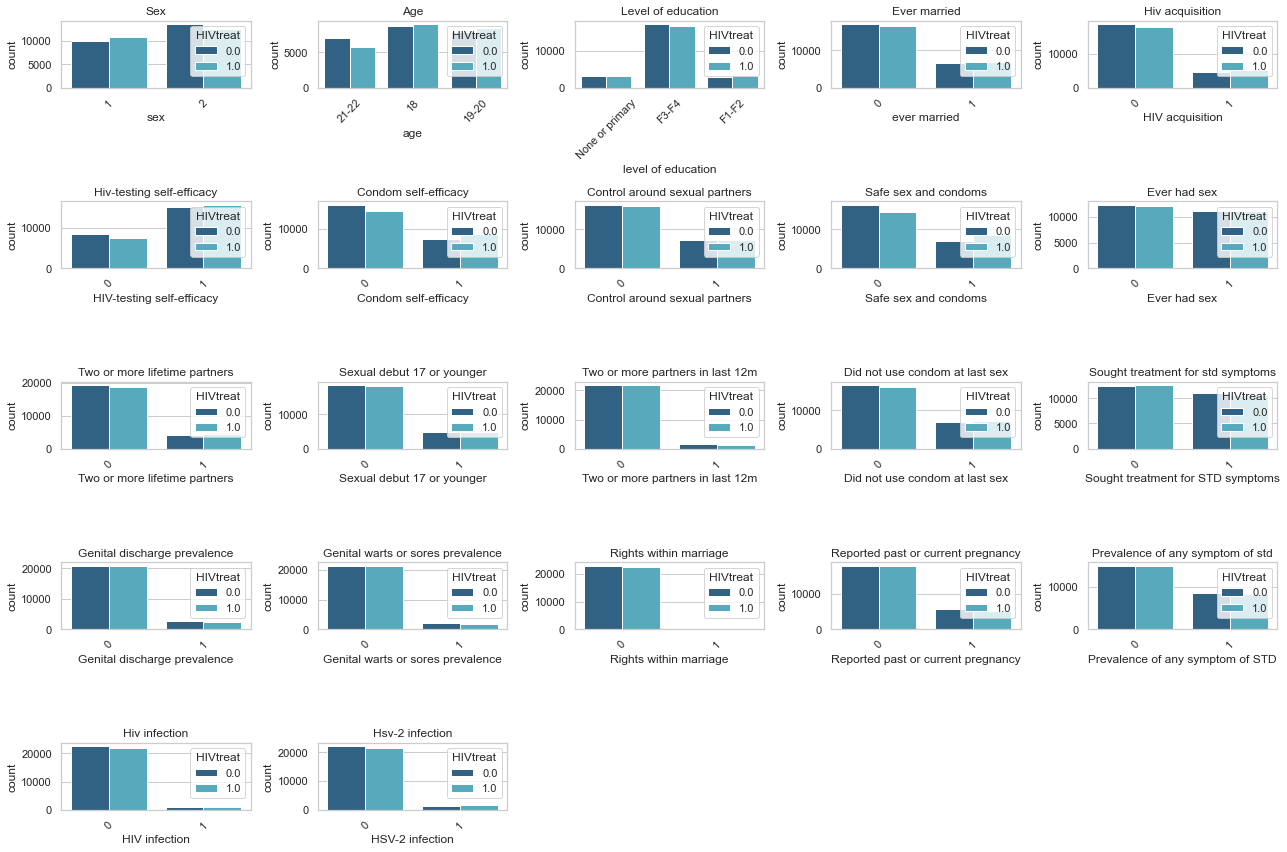

In [57]:
custom_palette = ['#256490', '#45b5cc', '#9dd1bd']
# Configurar el estilo de las gráficas
sns.set(style="whitegrid")

# Definir el tamaño de la figura
plt.figure(figsize=(18, 12))

# Lista de columnas categóricas
columnas_categoricas = ['sex','age', 'level of education', 'ever married', 'HIV acquisition', 'HIV-testing self-efficacy',
                        'Condom self-efficacy', 'Control around sexual partners', 'Safe sex and condoms', 'Ever had sex',
                        'Two or more lifetime partners', 'Sexual debut 17 or younger', 'Two or more partners in last 12m',
                        'Did not use condom at last sex', 'Sought treatment for STD symptoms', 'Genital discharge prevalence',
                        'Genital warts or sores prevalence', 'Rights within marriage', 'Reported past or current pregnancy',
                        'Prevalence of any symptom of STD', 'HIV infection', 'HSV-2 infection']

# Iterar sobre las columnas categóricas y crear subgráficos
for i, col in enumerate(columnas_categoricas, 1):
    plt.subplot(5, 5, i)
    
    # Graficar el conteo de cada categoría para cada grupo de HIVtreat y sex
    sns.countplot(x=col, hue='HIVtreat', data=df_sim, palette=custom_palette)
    
    # Ajustar el título de la gráfica
    plt.title(f'{col.capitalize()}')

    # Ajustar la leyenda
    plt.legend(title='HIVtreat')

    # Rotar etiquetas del eje x si es necesario
    plt.xticks(rotation=45)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar las gráficas
plt.show()


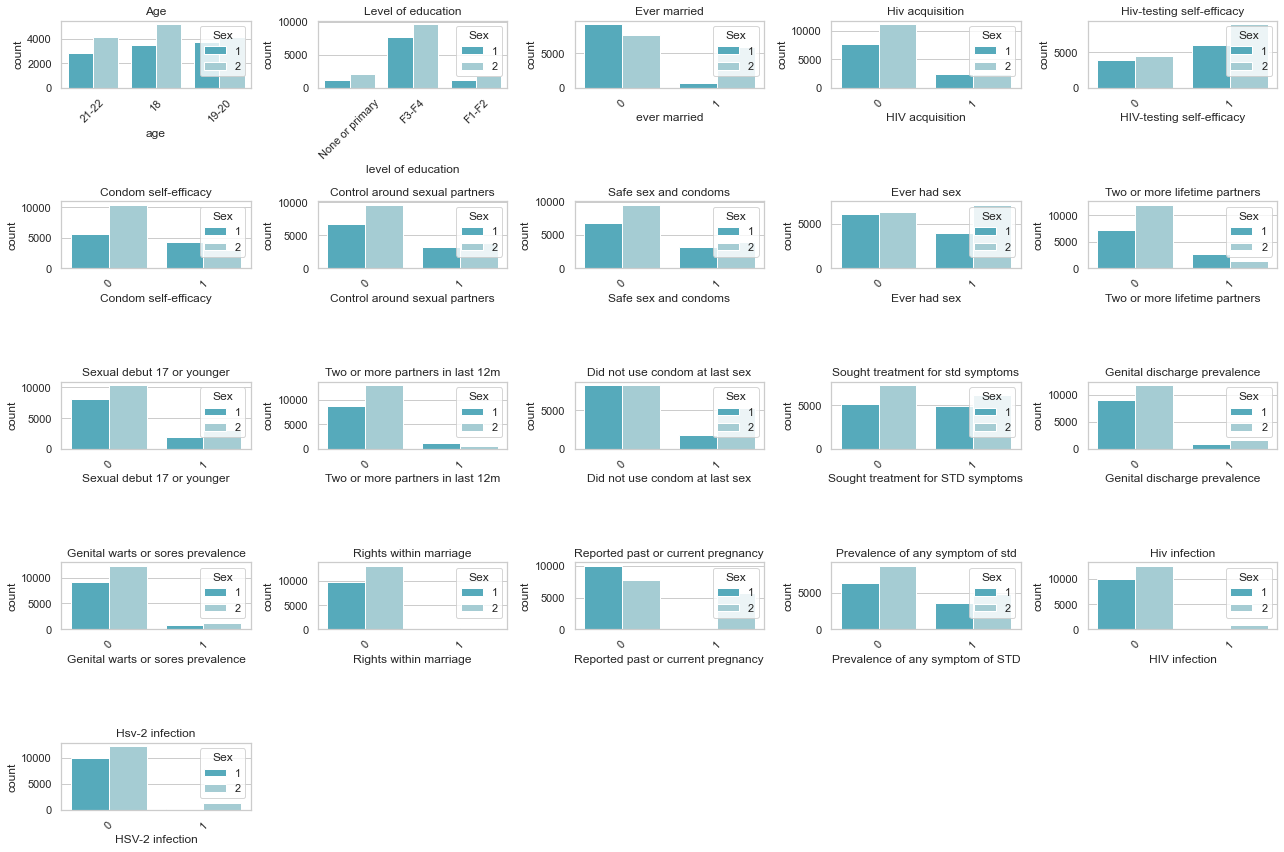

In [58]:
custom_palette = ['#45b5cc', '#9dd1db','#256490']
# Configurar el estilo de las gráficas
sns.set(style="whitegrid")

# Definir el tamaño de la figura
plt.figure(figsize=(18, 12))

# Lista de columnas categóricas
columnas_categoricas = ['age', 'level of education', 'ever married', 'HIV acquisition', 'HIV-testing self-efficacy',
                        'Condom self-efficacy', 'Control around sexual partners', 'Safe sex and condoms', 'Ever had sex',
                        'Two or more lifetime partners', 'Sexual debut 17 or younger', 'Two or more partners in last 12m',
                        'Did not use condom at last sex', 'Sought treatment for STD symptoms', 'Genital discharge prevalence',
                        'Genital warts or sores prevalence', 'Rights within marriage', 'Reported past or current pregnancy',
                        'Prevalence of any symptom of STD', 'HIV infection', 'HSV-2 infection']

# Iterar sobre las columnas categóricas y crear subgráficos
for i, col in enumerate(columnas_categoricas, 1):
    plt.subplot(5, 5, i)
    
    # Graficar el conteo de cada categoría para cada grupo de HIVtreat y sex
    sns.countplot(x=col, hue='sex', data=df_sim[df_sim['HIVtreat']==0], palette=custom_palette)
    
    # Ajustar el título de la gráfica
    plt.title(f'{col.capitalize()}')

    # Ajustar la leyenda
    plt.legend(title='Sex')

    # Rotar etiquetas del eje x si es necesario
    plt.xticks(rotation=45)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar las gráficas
plt.show()


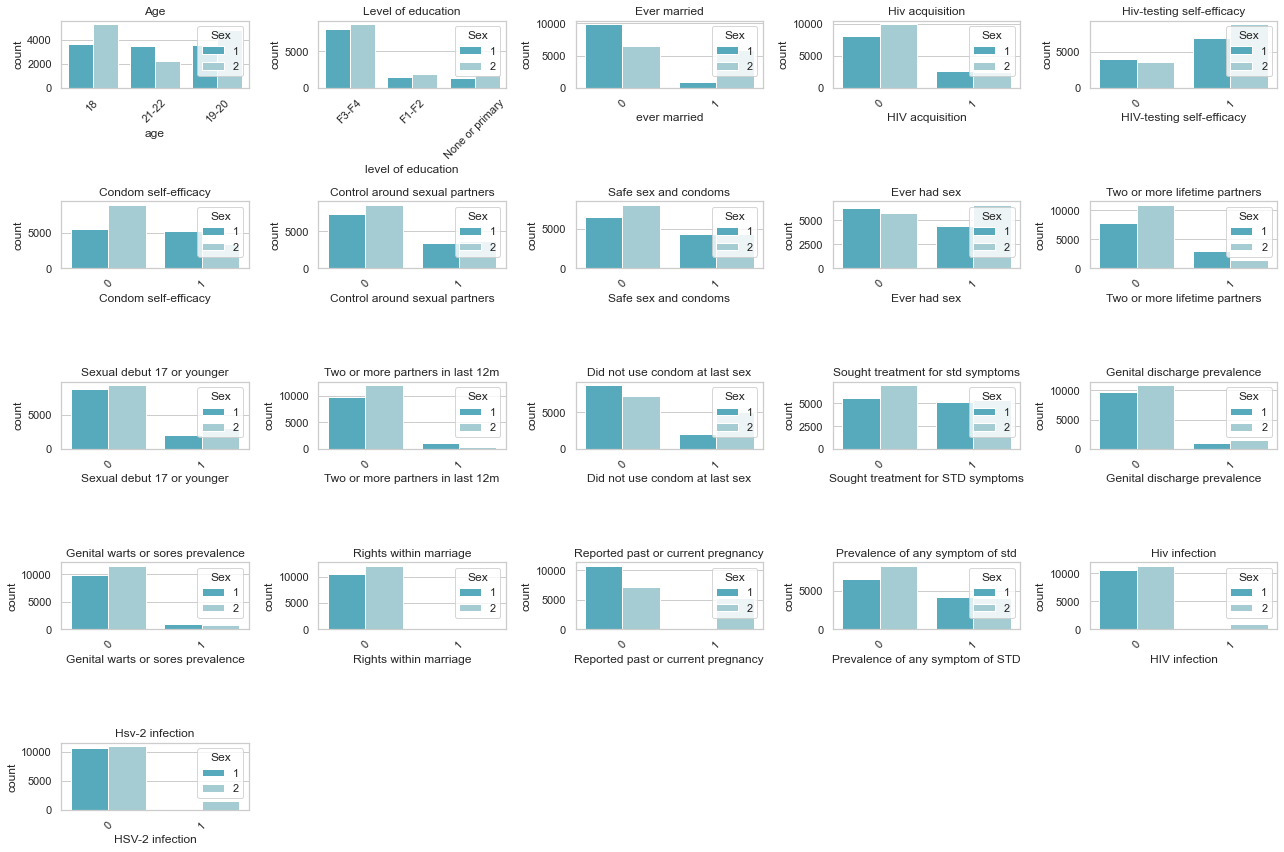

In [59]:
# Configurar el estilo de las gráficas
sns.set(style="whitegrid")

# Definir el tamaño de la figura
plt.figure(figsize=(18, 12))

# Lista de columnas categóricas
columnas_categoricas = ['age', 'level of education', 'ever married', 'HIV acquisition', 'HIV-testing self-efficacy',
                        'Condom self-efficacy', 'Control around sexual partners', 'Safe sex and condoms', 'Ever had sex',
                        'Two or more lifetime partners', 'Sexual debut 17 or younger', 'Two or more partners in last 12m',
                        'Did not use condom at last sex', 'Sought treatment for STD symptoms', 'Genital discharge prevalence',
                        'Genital warts or sores prevalence', 'Rights within marriage', 'Reported past or current pregnancy',
                        'Prevalence of any symptom of STD', 'HIV infection', 'HSV-2 infection']

# Iterar sobre las columnas categóricas y crear subgráficos
for i, col in enumerate(columnas_categoricas, 1):
    plt.subplot(5, 5, i)
    
    # Graficar el conteo de cada categoría para cada grupo de HIVtreat y sex
    sns.countplot(x=col, hue='sex', data=df_sim[df_sim['HIVtreat']==1], palette=custom_palette)
    
    # Ajustar el título de la gráfica
    plt.title(f'{col.capitalize()}')

    # Ajustar la leyenda
    plt.legend(title='Sex')

    # Rotar etiquetas del eje x si es necesario
    plt.xticks(rotation=45)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar las gráficas
plt.show()


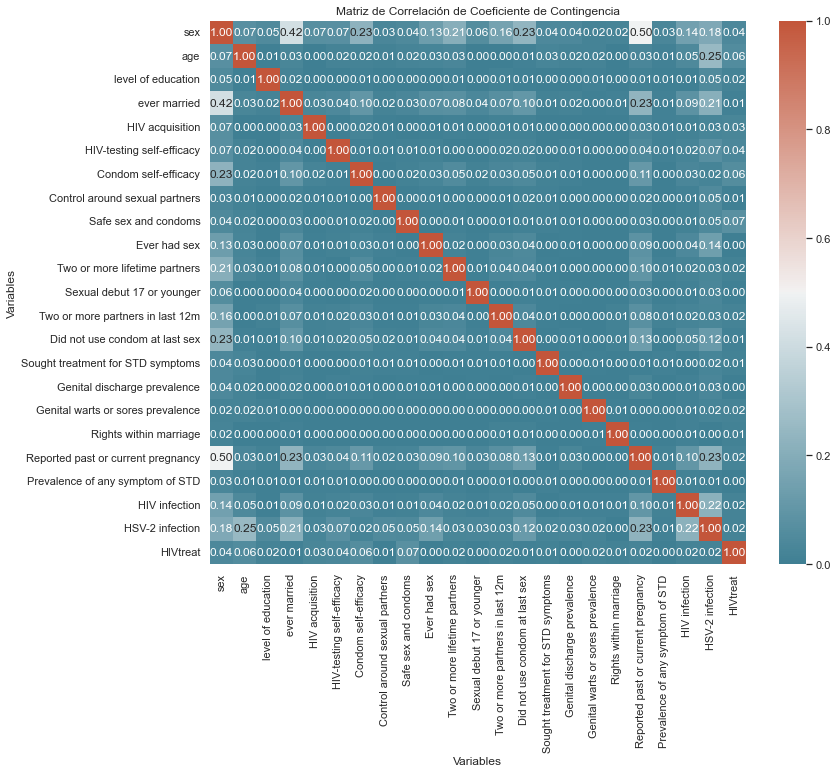

In [60]:
# Calcular la matriz de correlación
correlation_matrix = pd.DataFrame(index=df_sim.columns, columns=df_sim.columns)
for col1 in df.columns:
    for col2 in df.columns:
        contingency_table = pd.crosstab(df_sim[col1], df_sim[col2])
        correlation_matrix.loc[col1, col2] = contingency_coefficient(contingency_table)

# Convertir los valores de la matriz de correlación a números flotantes
correlation_matrix = correlation_matrix.astype(float)

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crear un mapa de calor para la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f")

# Añadir títulos y etiquetas
plt.title('Matriz de Correlación de Coeficiente de Contingencia')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Mostrar el mapa de calor
plt.show()

In [61]:
#df_sim.to_csv('.../df_sim9.csv', index=False)